# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# 데이터 프레임 만들기
df = pd.read_csv('/content/drive/MyDrive/코드스테이츠/vgames2 (1).csv', index_col = 0)

# 결측값 제거
df = df.dropna()

# 결측값 확인
df.isnull().sum()

df # shape = (16241, 9)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 지역 별 선호하는 게임 장르


In [3]:
import warnings
warnings.filterwarnings(action='ignore')

# 단위를 숫자로 치환 후 형 변형
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*0.001', 'M': '*1'},
                                        regex = True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*0.001', 'M': '*1'}
                                        , regex = True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*0.001', 'M': '*1'}
                                        , regex = True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'K': '*0.001', 'M': '*1'},
                                              regex = True).map(pd.eval).astype(float)

sales = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

In [4]:
# genre, sales 병합
sales = df[['NA_Sales',	'EU_Sales',
            'JP_Sales',	'Other_Sales']]
genre = df[['Genre']]
genre.reset_index(drop = True, inplace = True)

genre_sales = pd.concat([genre, sales],
                        join='inner', axis = 1)

genre_sales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Adventure,0.17,0.00,0.00,0.01
3,Misc,0.00,0.00,0.02,0.00
4,Platform,0.04,0.00,0.00,0.00
5,Sports,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16236,Platform,0.65,0.30,0.01,0.10
16237,Action,0.00,0.00,0.36,0.00
16238,Sports,0.00,0.00,0.06,0.00
16239,Action,0.05,0.10,0.00,0.03


In [5]:
# 그룹화
groups = genre_sales.groupby(genre_sales['Genre']).sum()

groups

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,875.23,509.66,237.68,164.53
Adventure,311.83,172.92,79.81,54.07
Fighting,228.48,126.72,73.32,44.08
Misc,404.75,236.57,131.51,71.02
Platform,252.64,146.36,71.61,45.35
Puzzle,135.25,60.96,44.48,20.05
Racing,284.31,160.17,82.37,49.39
Role-Playing,390.29,210.76,105.88,66.93
Shooter,339.25,204.53,112.32,63.75


In [6]:
# 폰트 설치
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [7]:
plt.rc('font', family='NanumBarunGothic')

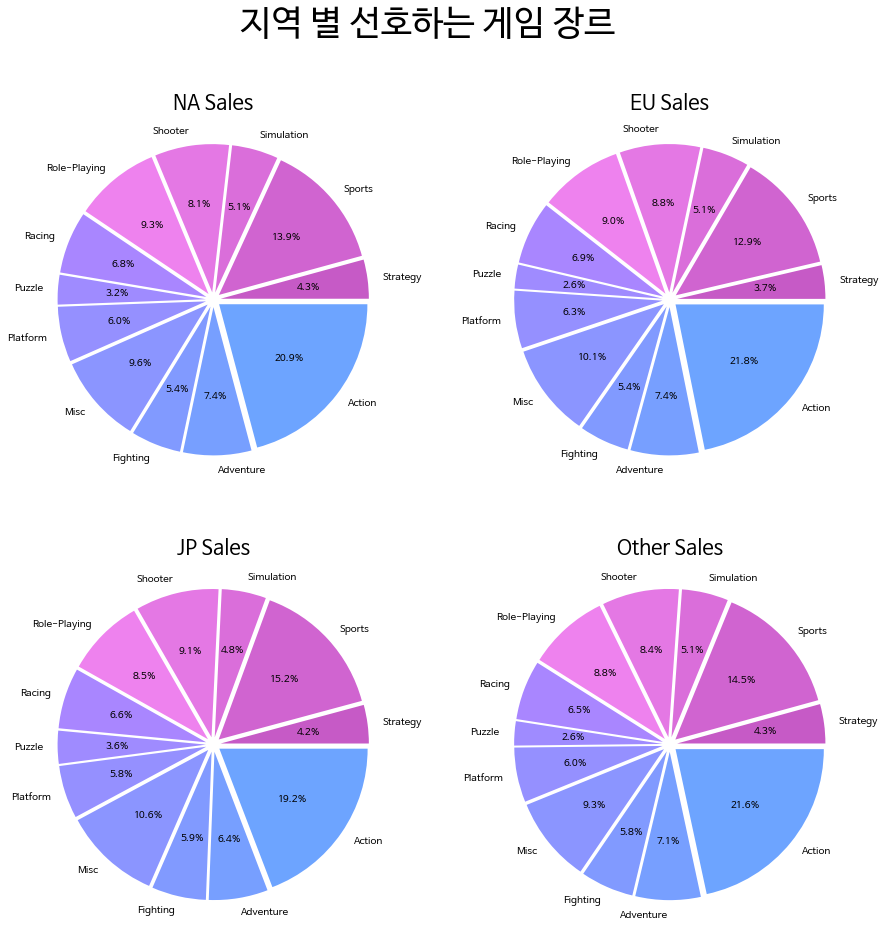

In [8]:
import numpy as np
# 시각화 설정
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
colors = ['#6da4ff', '#779fff', '#819aff', '#8b95ff', '#9590ff', '#9f8bff','#a986ff', '#EE82EE', '#E478E4', '#DA6EDA', '#D064D0', '#C65AC6']

# 격자 생성
f, axes = plt.subplots(2, 2)
f.set_size_inches((15, 15))

# 파이 차트 그리기
axes[0, 0].pie(groups['NA_Sales'], labels = groups.index, autopct = '%.1f%%', startangle = 360, counterclock = False, 
        explode = explode, colors = colors)
axes[0, 1].pie(groups['EU_Sales'], labels = groups.index, autopct = '%.1f%%', startangle = 360, counterclock = False, 
        explode = explode, colors = colors)
axes[1, 0].pie(groups['JP_Sales'], labels = groups.index, autopct = '%.1f%%', startangle = 360, counterclock = False, 
        explode = explode, colors = colors)
axes[1, 1].pie(groups['Other_Sales'], labels = groups.index, autopct = '%.1f%%', startangle = 360, counterclock = False, 
        explode = explode, colors = colors)

# 이름 설정
f.suptitle('지역 별 선호하는 게임 장르', fontsize = 35)
axes[0, 0].set_title('NA Sales', fontsize = 20)
axes[0, 1].set_title('EU Sales', fontsize = 20)
axes[1, 0].set_title('JP Sales', fontsize = 20)
axes[1, 1].set_title('Other Sales', fontsize = 20)

plt.show()

# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [21]:
from scipy.sparse import bsr

# 병합 설정
df['sales_sum'] = sales[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum(axis = 1)
sales_sum = df['sales_sum']
name = df[['Name']]
platform = df[['Platform']]

# 데이터 병합
ns = pd.concat([name, sales_sum], join='inner', axis = 1)
gs = pd.concat([genre, sales_sum], join='inner', axis = 1)
ps = pd.concat([platform, sales_sum], join='inner', axis = 1)
ngs = pd.concat([name, genre, sales_sum], join='inner', axis = 1)

# 출고량 Best 30
best1 = ns.nlargest(30, 'sales_sum', keep='first').reset_index(drop = True)
best2 = gs.nlargest(30, 'sales_sum', keep='first').reset_index(drop = True)
best3 = ps.nlargest(30, 'sales_sum', keep='first').reset_index(drop = True)
best4 = ngs.nlargest(30, 'sales_sum', keep='first').reset_index(drop = True)

# 출고량 best 데이터 Genre 기준 그룹핑
groups2 = best2.groupby(gs['Genre']).sum().reset_index()
groups3 = best3.groupby(ps['Platform']).sum().reset_index()
groups4 = pd.DataFrame(best4.groupby(['Name', 'Genre'])['sales_sum'].sum())

best4 = groups4.nlargest(30, 'sales_sum', keep='first')

groups2

,Genre,sales_sum
0,Action,115.39
1,Adventure,64.14
2,Fighting,15.84
3,Misc,33.00
4,Platform,79.60
5,Puzzle,22.00
6,Racing,53.37
7,Role-Playing,64.76
8,Shooter,14.97
9,Simulation,70.38


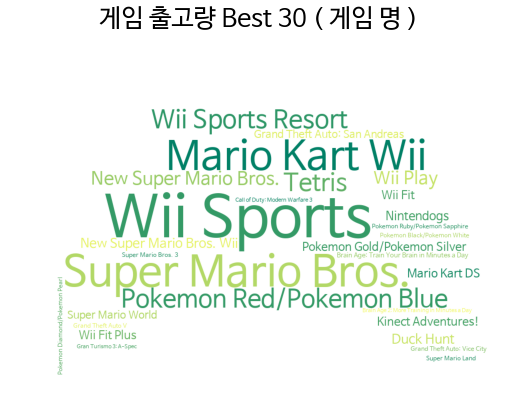

In [10]:
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

# 워드 클라우드 그리기
image = Image.open('/content/drive/MyDrive/^^/game.png').convert("RGBA")
mask_arr = np.array(image)

wordcloud = WordCloud(font_path = 'NanumBarunGothic',
                      width = 500,
                      height = 500,
                      background_color ='white',
                      mask = mask_arr,
                      colormap = 'summer')

text = best1['Name']
count = best1['sales_sum']
dit = best1.set_index('Name').to_dict()['sales_sum']

keyword = wordcloud.generate_from_frequencies(dit)
array = keyword.to_array()

plt.figure(figsize = (9, 9))
plt.imshow(array)
plt.axis('off')
plt.title("게임 출고량 Best 30 ( 게임 명 )", size = 25)
plt.show()

Text(0.5, 1.0, '장르')

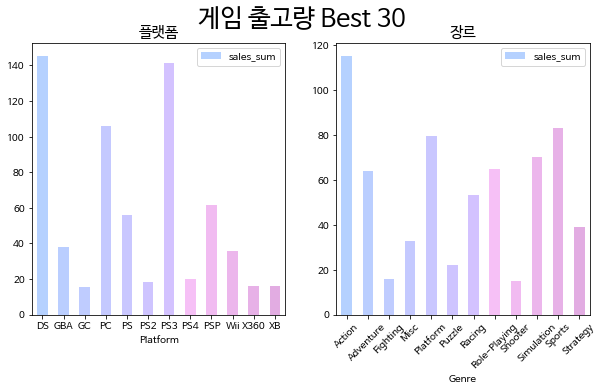

In [11]:
# 격자 생성
f, ax = plt.subplots(1, 2)
f.set_size_inches((10, 5))

# 바 차트 그리기
groups3.plot('Platform', 'sales_sum', kind = 'bar', rot = 0,
             ax = ax[0], color = colors, alpha = 0.5)

groups2.plot('Genre', 'sales_sum', kind = 'bar', rot = 45,
             ax = ax[1], color = colors, alpha = 0.5)

f.suptitle('게임 출고량 Best 30', fontsize = 25)
ax[0].set_title('플랫폼', fontsize = 15)
ax[1].set_title('장르', fontsize = 15)

# 연도별 게임의 트렌드

In [12]:
# 데이터 병합
year = df[['Year']]
year = year.astype(int)
ys = pd.concat([year, sales_sum], join='inner', axis = 1)
# ygs = pd.concat([year, genre, sales_sum], join='inner', axis = 1) 시간 부족...

# 연도 한, 두 자리 수 삭제
ys = ys[ys.Year > 1900].reset_index(drop = 'Ture')


# 그룹화
ys = pd.DataFrame(ys.groupby(['Year'])['sales_sum'].sum()).reset_index()
ys = ys.iloc[0:37] # 17년도 이후의 값 삭제

ys

,Year,sales_sum
0,1980,10.88
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.35
5,1985,53.95
6,1986,36.03
7,1987,21.70
8,1988,47.21
9,1989,73.45


Text(0.5, 1.0, '연도 별 게임 판매량')

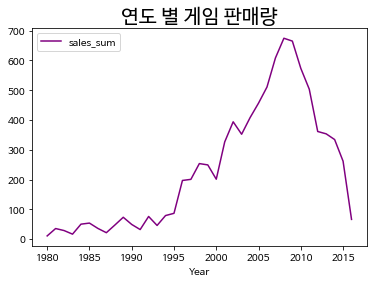

In [13]:
# 스캐터 플롯
ys.plot('Year', 'sales_sum',linestyle='solid',color='purple')

plt.title("연도 별 게임 판매량", size = 20)